# Data

In [ ]:
# breast cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X_bc, y_bc = load_breast_cancer(return_X_y=True)
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, random_state=0)

X_bc_train.shape, X_bc_test.shape

((426, 30), (143, 30))

In [ ]:
#california housing dataset
from sklearn.datasets import fetch_california_housing

X_ch, y_ch = fetch_california_housing(return_X_y=True)
X_ch_train, X_ch_test, y_ch_train, y_ch_test = train_test_split(X_ch, y_ch, random_state=0)

X_ch_train.shape, X_ch_test.shape

((15480, 8), (5160, 8))

# sklearn perceptron
- classification
- only for two classes (binary) in output

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
clf.fit(X_bc_train, y_bc_train)

Perceptron()

In [ ]:
clf.coef_.shape

(1, 30)

In [ ]:
clf.intercept_

array([253.])

In [ ]:
# predicted classes
clf.predict(X_bc_test[:5])

array([1, 1, 1, 1, 1])

In [ ]:
# actual output
y_bc_test[:5]

array([0, 1, 1, 1, 1])

In [ ]:
clf.score(X_bc_train, y_bc_train)

0.8497652582159625

In [ ]:
clf.score(X_bc_test, y_bc_test)

0.8531468531468531

# sklearn MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=[5], activation='relu' , random_state=0, max_iter=1000)
clf.fit(X_bc_train, y_bc_train)
clf.score(X_bc_train, y_bc_train), clf.score(X_bc_test, y_bc_test)

(0.9436619718309859, 0.9440559440559441)

In [ ]:
len(clf.coefs_), clf.coefs_[0].shape, clf.coefs_[1].shape

(2, (30, 5), (5, 1))

In [ ]:
len(clf.intercepts_), clf.intercepts_[0].shape, clf.intercepts_[1].shape

(2, (5,), (1,))

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=[10, 20], activation='relu' , random_state=0, max_iter=1000)
clf.fit(X_bc_train, y_bc_train)
clf.score(X_bc_train, y_bc_train), clf.score(X_bc_test, y_bc_test)

(0.9460093896713615, 0.9300699300699301)

In [ ]:
len(clf.coefs_), clf.coefs_[0].shape, clf.coefs_[1].shape, clf.coefs_[2].shape

(3, (30, 10), (10, 20), (20, 1))

In [ ]:
len(clf.intercepts_), clf.intercepts_[0].shape, clf.intercepts_[1].shape, clf.intercepts_[2].shape

(3, (10,), (20,), (1,))

## regression

In [ ]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=[100,100,100], activation='tanh' , random_state=0, max_iter=1000, solver='adam')
reg.fit(X_ch_train, y_ch_train)
reg.score(X_ch_train, y_ch_train), reg.score(X_ch_test, y_ch_test)

(0.6531902017980253, 0.6400241340197584)

# Tensorflow and Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X_bc_train.shape[1]

30

## binary classification

In [ ]:
# breast cancer dataset: output binary(0,1)
model = keras.models.Sequential([
keras.layers.Input( shape=30 ), # input layer
keras.layers.Dense( 10, activation='relu', name='hidden-1' ),     # hiddenlayer-I
keras.layers.Dense( 20, activation='relu', name='hidden-2' ),     # second hidden layer
keras.layers.Dense( 1, activation='sigmoid', name='output' ),      # output layer
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 10)                310       
                                                                 
 hidden-2 (Dense)            (None, 20)                220       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_bc_train, y_bc_train, epochs=20, verbose=0)

In [ ]:
model.evaluate(X_bc_train, y_bc_train)

14/14 [==============================] - 0s 4ms/step - loss: 0.1775 - accuracy: 0.9249


[0.17745773494243622, 0.9248826503753662]

In [ ]:
model.evaluate(X_bc_test, y_bc_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9371


[0.19108493626117706, 0.9370629191398621]

## regression

In [ ]:
model = keras.models.Sequential([
keras.layers.Input( shape=X_ch_train.shape[1] ), # input layer
keras.layers.Dense( 100, activation='relu', name='hidden-1' ),     # hiddenlayer-I
keras.layers.Dense( 50, activation='relu', name='hidden-2' ),     # second hidden layer
keras.layers.Dense( 20, activation='relu', name='hidden-3' ),     # third hidden layer
keras.layers.Dense( 1, name='output' ),      # output layer
])

In [ ]:
model.compile( loss='mse', optimizer='adam')

In [ ]:
model.fit(X_ch_train, y_ch_train, epochs=10, verbose=1)

Epoch 1/10
484/484 [==============================] - 2s 3ms/step - loss: 61.1252
Epoch 2/10
484/484 [==============================] - 1s 3ms/step - loss: 2.4463
Epoch 3/10
484/484 [==============================] - 1s 1ms/step - loss: 1.5346
Epoch 4/10
484/484 [==============================] - 1s 1ms/step - loss: 4.4906
Epoch 5/10
484/484 [==============================] - 1s 1ms/step - loss: 3.3361
Epoch 6/10
484/484 [==============================] - 1s 1ms/step - loss: 3.1868
Epoch 7/10
484/484 [==============================] - 1s 1ms/step - loss: 6.3418
Epoch 8/10
484/484 [==============================] - 1s 1ms/step - loss: 0.9218
Epoch 9/10
484/484 [==============================] - 1s 1ms/step - loss: 1.0118
Epoch 10/10
484/484 [==============================] - 1s 1ms/step - loss: 3.5642


In [ ]:
model.evaluate(X_ch_train, y_ch_train)

484/484 [==============================] - 1s 952us/step - loss: 0.6568


0.6567937731742859

In [ ]:
model.evaluate(X_ch_test, y_ch_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.6836


0.6835570931434631

In [ ]:
y_pred_ch_train = model.predict(X_ch_train)
y_pred_ch_test  = model.predict(X_ch_test)

162/162 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import r2_score
print('Training Score', r2_score(y_pred_ch_train, y_ch_train))
print('Test Score', r2_score(y_pred_ch_test, y_ch_test))

Training Score -0.2995798610354268
Test Score -0.3379744486938685


## Multiclass

In [ ]:
fashion = keras.datasets.fashion_mnist
(X_fm_train, y_fm_train), (X_fm_test, y_fm_test) =  fashion.load_data()
X_fm_train.shape, X_fm_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [ ]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

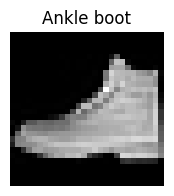

In [ ]:
import matplotlib.pyplot as plt
N = 50000
plt.figure(figsize=(2,2))
plt.title(class_labels[y_fm_train[N]])
plt.imshow(X_fm_train[N], 'gray')
plt.axis('off');

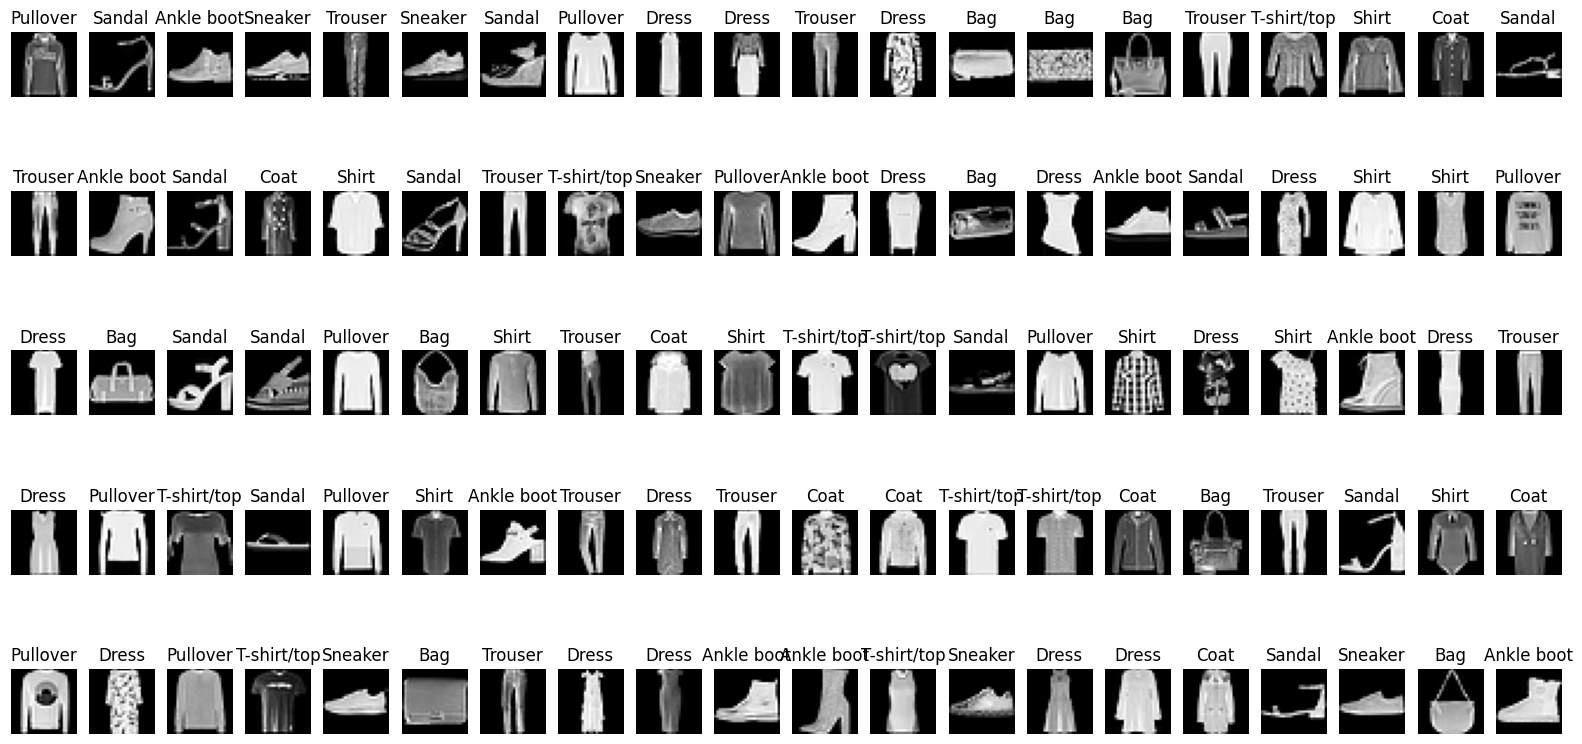

In [ ]:
import random

r = 5   # rows
c = 20  # columns
plt.figure(figsize=(20,10))
for i in range(1, r*c+1):
  plt.subplot(r, c, i)
  ind = random.randint(0, 60_000)
  plt.title(class_labels[y_fm_train[ind]])
  plt.imshow(X_fm_train[ind], 'gray')
  plt.axis('off');


In [ ]:
from collections import Counter
Counter(y_fm_train)

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

In [ ]:
Counter(y_fm_test)

Counter({9: 1000,
         2: 1000,
         1: 1000,
         6: 1000,
         4: 1000,
         5: 1000,
         7: 1000,
         3: 1000,
         8: 1000,
         0: 1000})

In [ ]:
X_fm_train.shape

(60000, 28, 28)

In [ ]:
28*28

784

In [ ]:
# fashion mnist  dataset: output multiclass(0,1,...,9)
model = keras.models.Sequential([
keras.layers.Input( shape=(28,28) ), # input layer
keras.layers.Flatten(),
keras.layers.Dense( 100, activation='relu', name='hidden-1' ),     # hiddenlayer-I
keras.layers.Dense( 50, activation='relu', name='hidden-2' ),     # second hidden layer
keras.layers.Dense( 10, activation='softmax', name='output' ),      # output layer
])
model.compile( loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_fm_train, y_fm_train, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4381 - accuracy: 0.7505
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5956 - accuracy: 0.8078
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5205 - accuracy: 0.8226
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4770 - accuracy: 0.8320
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4506 - accuracy: 0.8414
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4314 - accuracy: 0.8477
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4069 - accuracy: 0.8540
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3896 - accuracy: 0.8588
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3822 - accuracy: 0.8638
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.380

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden-1 (Dense)            (None, 100)               78500     
                                                                 
 hidden-2 (Dense)            (None, 50)                5050      
                                                                 
 output (Dense)              (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_fm_test[0].shape

(28, 28)

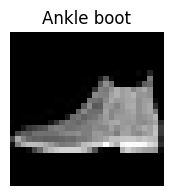

In [ ]:
N = 0
plt.figure(figsize=(2,2))
plt.title(class_labels[y_fm_test[N]])
plt.imshow(X_fm_test[N], 'gray')
plt.axis('off');

In [ ]:
X_fm_test[0].reshape(1,28,28).shape

(1, 28, 28)

In [ ]:
y_pred_test_0 = model.predict(X_fm_test[0].reshape(1,28,28))
y_pred_test_0

1/1 [==============================] - 0s 74ms/step


array([[3.1197513e-05, 5.4838497e-04, 2.7427129e-06, 1.3370736e-03,
        2.3141058e-05, 1.4597498e-01, 1.8928185e-05, 5.9676826e-02,
        1.4669155e-03, 7.9091984e-01]], dtype=float32)

In [ ]:
import numpy as np
np.argmax(y_pred_test_0)

9

In [ ]:
class_labels[9]

'Ankle boot'